<a href="https://colab.research.google.com/github/lfa-systems/Alura_Store_BR/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [153]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.250,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.263,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.965,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [154]:
loja1 = loja # Padronizar o nome da loja com os demais

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
dados = [loja1,loja2,loja3,loja4]

def faturamento(loja):
  faturamento = loja["Preço"].sum()
  return faturamento

faturamentos = []
for i in dados:
  faturamentos.append(faturamento(i))


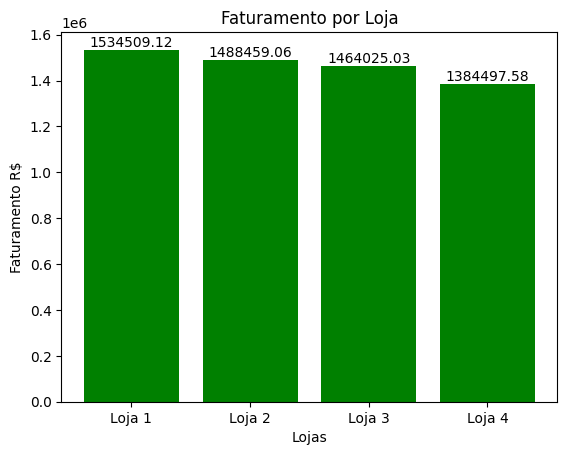

In [155]:
import matplotlib.pyplot as plt
plt.xlabel('Lojas')
plt.ylabel('Faturamento R$')
plt.title('Faturamento por Loja')
barras = plt.bar(lojas, faturamentos, color='green')
plt.bar_label(barras, fmt='%.2f', label_type='edge' )
plt.show()




# 2. Vendas por Categoria


In [156]:
vendas_por_categoria_l1 = loja1.groupby('Categoria do Produto')['Produto'].count().reset_index()
vendas_por_categoria_l2 = loja2.groupby('Categoria do Produto')['Produto'].count().reset_index()
vendas_por_categoria_l3 = loja3.groupby('Categoria do Produto')['Produto'].count().reset_index()
vendas_por_categoria_l4 = loja4.groupby('Categoria do Produto')['Produto'].count().reset_index()

categorias_mais_populares_l1 = vendas_por_categoria_l1.sort_values(by='Produto', ascending=False)
categorias_mais_populares_l2 = vendas_por_categoria_l2.sort_values(by='Produto', ascending=False)
categorias_mais_populares_l3 = vendas_por_categoria_l3.sort_values(by='Produto', ascending=False)
categorias_mais_populares_l4 = vendas_por_categoria_l4.sort_values(by='Produto', ascending=False)

In [157]:
print("=== Loja1 ===\n",vendas_por_categoria_l1,"\nMais Popular:\n",categorias_mais_populares_l1)
print("=== Loja2 ===\n",vendas_por_categoria_l2,"\nMais Popular:\n",categorias_mais_populares_l2)
print("=== Loja3 ===\n",vendas_por_categoria_l3,"\nMais Popular:\n",categorias_mais_populares_l3)
print("=== Loja4 ===\n",vendas_por_categoria_l4,"\nMais Popular:\n",categorias_mais_populares_l4)

=== Loja1 ===
     Categoria do Produto  Produto
0             brinquedos      324
1       eletrodomesticos      312
2            eletronicos      448
3        esporte e lazer      284
4  instrumentos musicais      182
5                 livros      173
6                 moveis      465
7  utilidades domesticas      171 
Mais Popular:
     Categoria do Produto  Produto
6                 moveis      465
2            eletronicos      448
0             brinquedos      324
1       eletrodomesticos      312
3        esporte e lazer      284
4  instrumentos musicais      182
5                 livros      173
7  utilidades domesticas      171
=== Loja2 ===
     Categoria do Produto  Produto
0             brinquedos      313
1       eletrodomesticos      305
2            eletronicos      422
3        esporte e lazer      275
4  instrumentos musicais      224
5                 livros      197
6                 moveis      442
7  utilidades domesticas      181 
Mais Popular:
     Categoria do Pro

# 3. Média de Avaliação das Lojas

In [158]:
media_l1 = loja1["Avaliação da compra"].mean()
media_l2 = loja2["Avaliação da compra"].mean()
media_l3 = loja3["Avaliação da compra"].mean()
media_l4 = loja4["Avaliação da compra"].mean()

print(media_l1.round(2), "%.2f" % media_l2, "%.2f" % media_l3, "%.2f" %media_l4)

3.98 4.04 4.05 4.00


# 4. Produtos Mais e Menos Vendidos

In [159]:
vendas_por_produto_l1 = loja1['Produto'].value_counts().reset_index()
vendas_por_produto_l1.columns = ['produto', 'quantidade']
mais_vendido_l1 = vendas_por_produto_l1.iloc[0]
menos_vendido_l1 = vendas_por_produto_l1.iloc[-1]
mais_vendido_l1 = mais_vendido_l1.to_dict()
menos_vendido_l1 = menos_vendido_l1.to_dict()

vendas_por_produto_l2 = loja2['Produto'].value_counts().reset_index()
vendas_por_produto_l2.columns = ['produto', 'quantidade']
mais_vendido_l2 = vendas_por_produto_l2.iloc[0]
menos_vendido_l2 = vendas_por_produto_l2.iloc[-1]
mais_vendido_l2 = mais_vendido_l2.to_dict()
menos_vendido_l2 = menos_vendido_l2.to_dict()

vendas_por_produto_l3 = loja3['Produto'].value_counts().reset_index()
vendas_por_produto_l3.columns = ['produto', 'quantidade']
mais_vendido_l3 = vendas_por_produto_l3.iloc[0]
menos_vendido_l3 = vendas_por_produto_l3.iloc[-1]
mais_vendido_l3 = mais_vendido_l3.to_dict()
menos_vendido_l3 = menos_vendido_l3.to_dict()

vendas_por_produto_l4 = loja4['Produto'].value_counts().reset_index()
vendas_por_produto_l4.columns = ['produto', 'quantidade']
mais_vendido_l4 = vendas_por_produto_l4.iloc[0]
menos_vendido_l4 = vendas_por_produto_l4.iloc[-1]
mais_vendido_l4 = mais_vendido_l4.to_dict()
menos_vendido_l4 = menos_vendido_l4.to_dict()

print('>>> Loja 1 <<<')
print("Mais vendido:", mais_vendido_l1)
print("Menos vendido:", menos_vendido_l1)

print('>>> Loja 2 <<<')
print("Mais vendido:", mais_vendido_l2)
print("Menos vendido:", menos_vendido_l2)

print('>>> Loja 3 <<<')
print("Mais vendido:", mais_vendido_l3)
print("Menos vendido:", menos_vendido_l3)

print('>>> Loja 4 <<<')
print("Mais vendido:", mais_vendido_l4)
print("Menos vendido:", menos_vendido_l4)

>>> Loja 1 <<<
Mais vendido: {'produto': 'Micro-ondas', 'quantidade': 60}
Menos vendido: {'produto': 'Celular ABXY', 'quantidade': 33}
>>> Loja 2 <<<
Mais vendido: {'produto': 'Iniciando em programação', 'quantidade': 65}
Menos vendido: {'produto': 'Jogo de tabuleiro', 'quantidade': 32}
>>> Loja 3 <<<
Mais vendido: {'produto': 'Kit banquetas', 'quantidade': 57}
Menos vendido: {'produto': 'Blocos de montar', 'quantidade': 35}
>>> Loja 4 <<<
Mais vendido: {'produto': 'Cama box', 'quantidade': 62}
Menos vendido: {'produto': 'Guitarra', 'quantidade': 33}


# 5. Frete Médio por Loja


In [160]:
media_frete_l1 = loja1["Frete"].mean()
media_frete_l2 = loja2["Frete"].mean()
media_frete_l3 = loja3["Frete"].mean()
media_frete_l4 = loja4["Frete"].mean()

print(media_frete_l1.round(2).item(), media_frete_l2.round(2).item(), media_frete_l3.round(2).item(), media_frete_l4.round(2).item())

34.69 33.62 33.07 31.28
